<a href="https://colab.research.google.com/github/jackieefuentes/Skyline-Math-200/blob/main/Python_Notebook_Setup_Research_Q_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question #2: Is there an association between how your health is and what time you go to sleep?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

Codebook 1
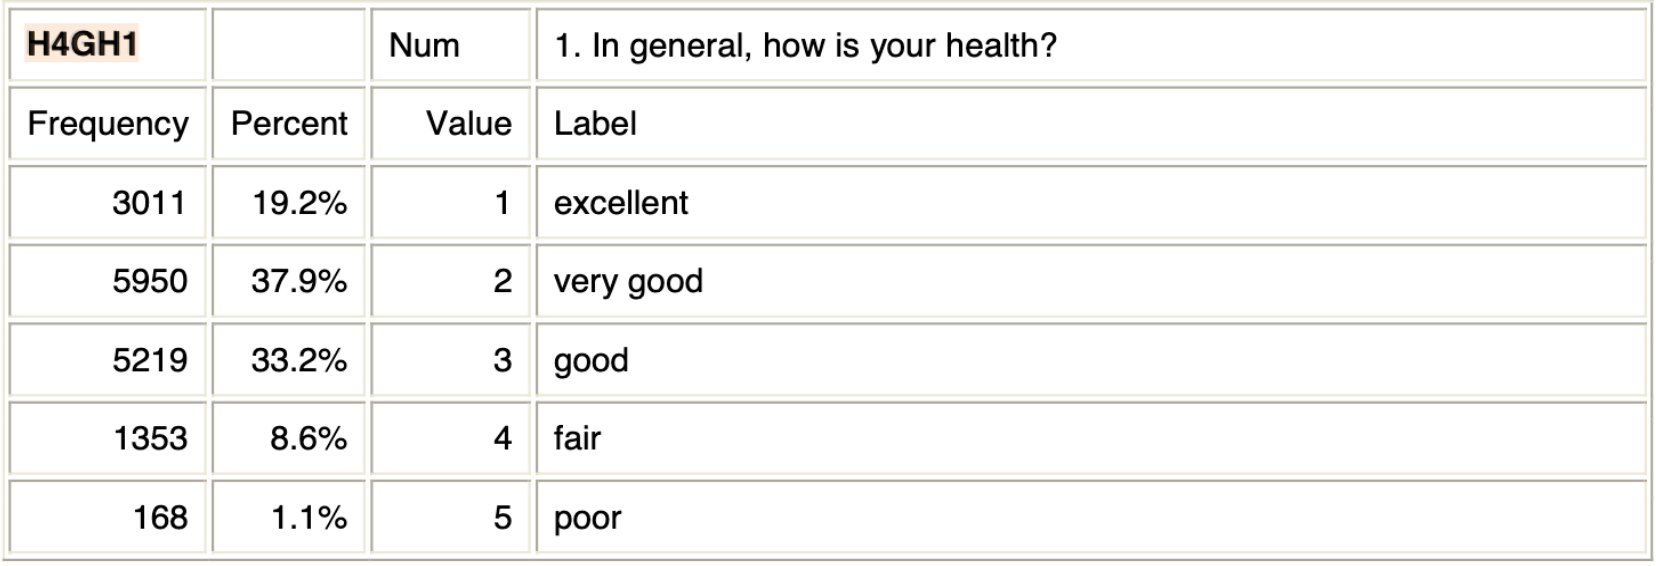

In [ ]:
#Manage data for variable 1

In [ ]:
df['H4GH1'].value_counts()

2    1963
3    1683
     1390
1     979
4     434
5      55
Name: H4GH1, dtype: int64

In [ ]:
df['health'] = df['H4GH1']
df['health'].value_counts()

2    1963
3    1683
     1390
1     979
4     434
5      55
Name: health, dtype: int64

In [ ]:
df['health'] = df['health'].loc[df['health'] !=' ']
df['health'].value_counts()

2    1963
3    1683
1     979
4     434
5      55
Name: health, dtype: int64

In [ ]:
df['health'].replace(['2','3','1','4','5'] , ['Very Good','Good','Excellent','Fair','Poor'], inplace = True)
df['health'].value_counts()

Very Good    1963
Good         1683
Excellent     979
Fair          434
Poor           55
Name: health, dtype: int64

In [ ]:
pip install ResearchPy

In [ ]:
import researchpy as rp

In [ ]:
rp.summary_cat(df['health'])

,Variable,Outcome,Count,Percent
0,health,Very Good,1963,38.38
1,,Good,1683,32.91
2,,Excellent,979,19.14
3,,Fair,434,8.49
4,,Poor,55,1.08


In [ ]:
#Graphs and tables or statistics

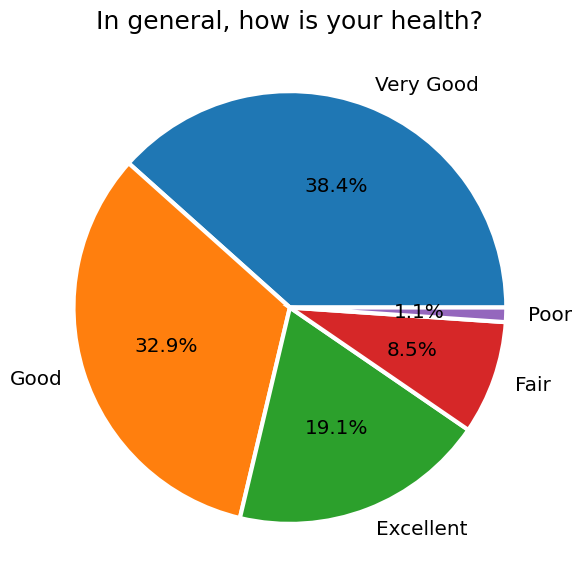

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

x = [38.38, 32.91, 19.14, 8.49, 1.08]
labels=["Very Good", "Good", "Excellent", "Fair", "Poor"]

ax.pie(x, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('In general, how is your health?', fontsize=18)
plt.tight_layout()

Text(0, 0.5, 'Percent')

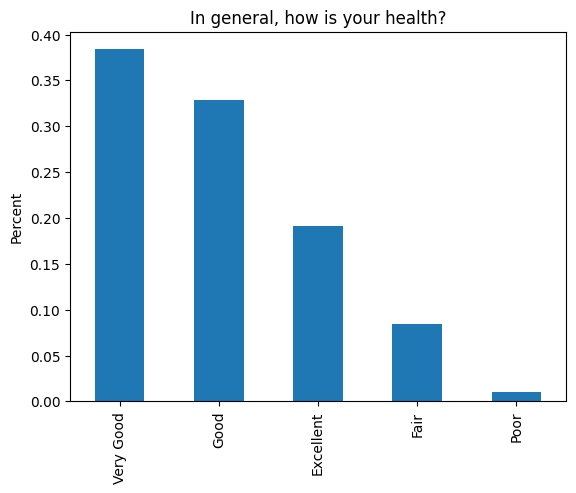

In [ ]:
df['health'].value_counts(normalize = True).plot(kind ='bar')
plt.title("In general, how is your health?")
plt.ylabel("Percent")

Codebook 2:
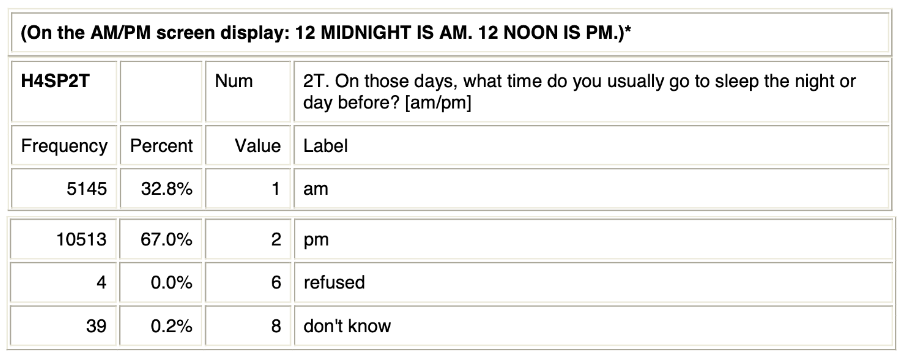
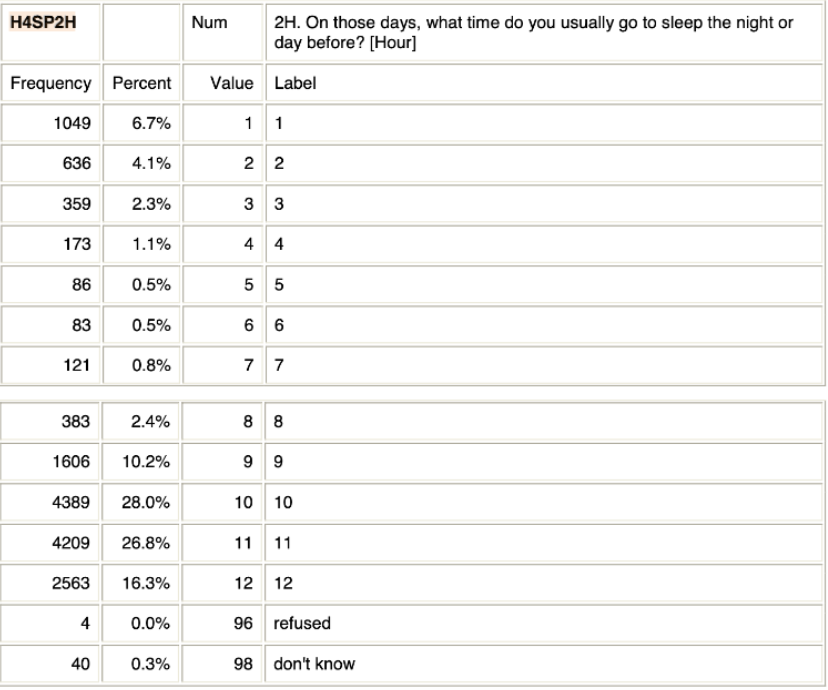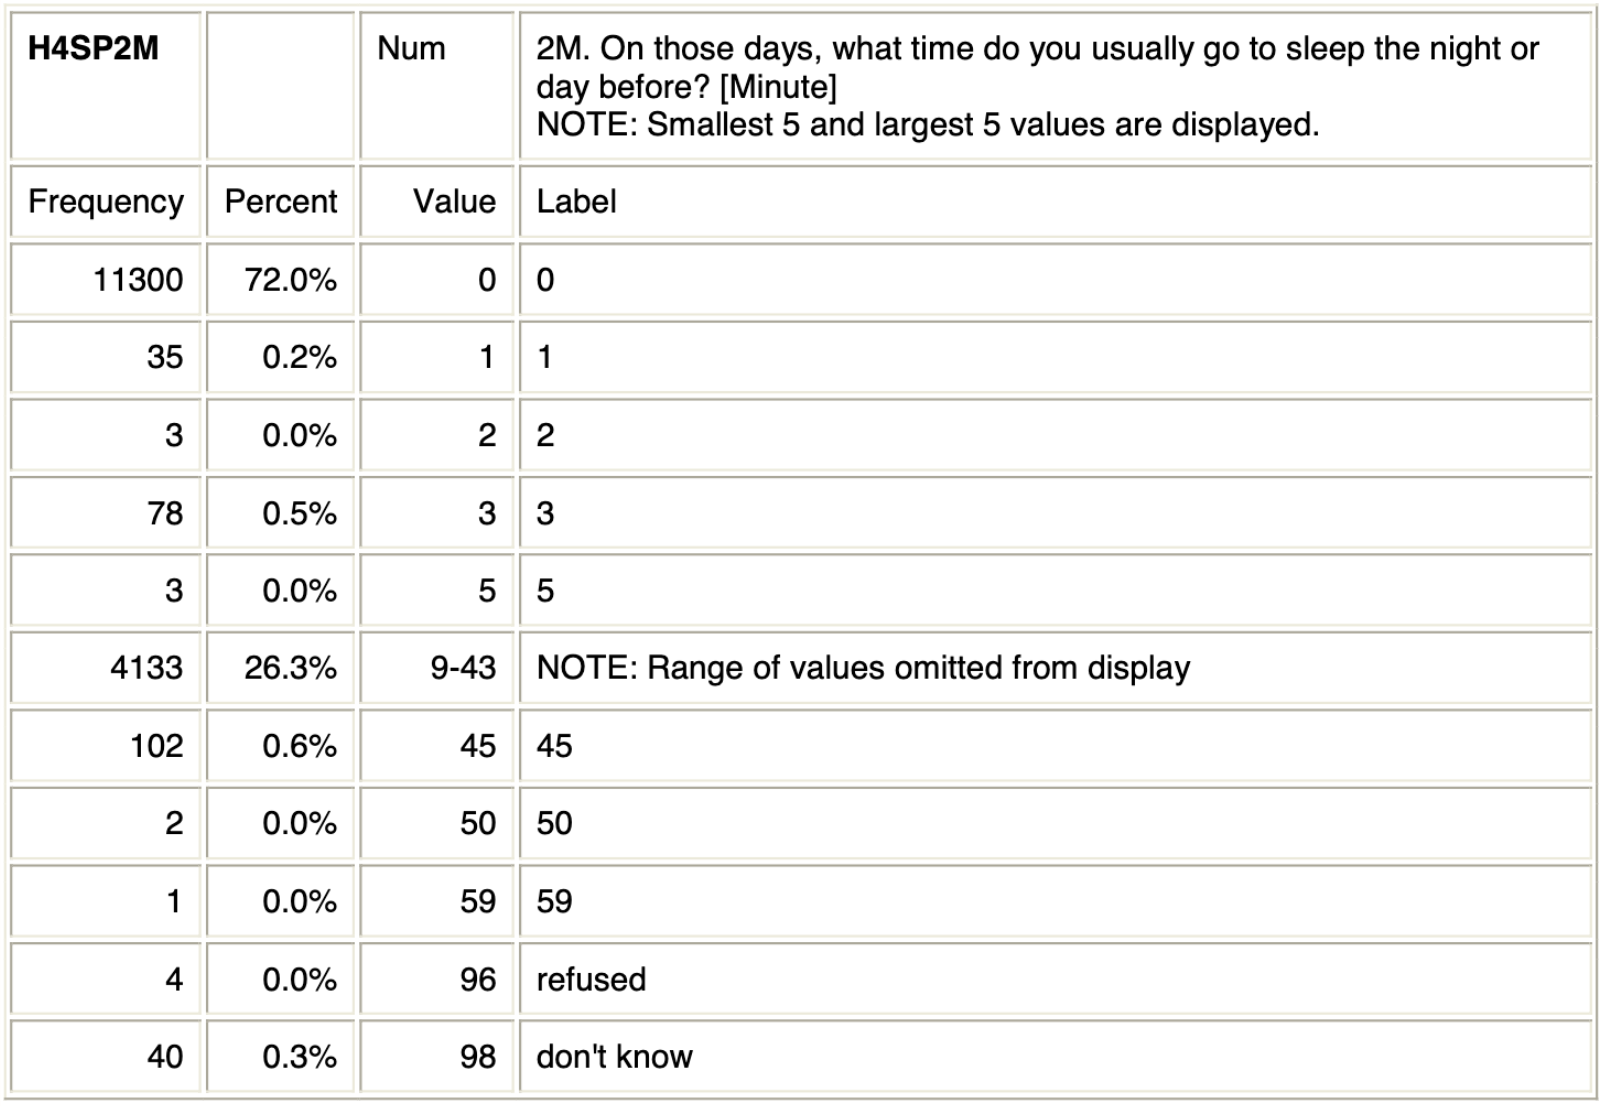

In [ ]:
#Manage data for variable 2

In [13]:
df['H4SP2H'].value_counts()

10    1442
      1390
11    1372
12     803
9      540
1      339
2      214
8      129
3      112
4       55
7       43
5       30
6       23
98      11
96       1
Name: H4SP2H, dtype: int64

In [14]:
df['hour'] = df['H4SP2H']
df['hour']= pd.to_numeric(df['hour'],errors= 'coerce')
df['hour']= df['hour'].loc[df['hour'] < 96]
df['hour']= df['hour'].loc[df['hour'] != ' ']
df['hour'].max()

12.0

In [15]:
df['H4SP2M'].value_counts()

0     3664
      1390
30    1333
45      33
3       25
15      20
1       11
98      11
20       5
5        2
40       2
10       2
9        2
96       1
59       1
39       1
33       1
Name: H4SP2M, dtype: int64

In [16]:
df['sleeptime_min']= df['H4SP2M']
df['sleeptime_min']= pd.to_numeric(df['sleeptime_min'],errors= 'coerce')
df['sleeptime_min']= df['sleeptime_min'].loc[df['sleeptime_min'] < 96]
df['sleeptime_min']= df['sleeptime_min'].loc[df['sleeptime_min'] != ' ']
df['sleeptime_min'].max()

59.0

In [17]:
df['H4SP2T'].value_counts()

2    3421
1    1681
     1390
8      11
6       1
Name: H4SP2T, dtype: int64

In [18]:
df['am_pm']=df['H4SP2T']
df['am_pm'] = df['am_pm'].loc[df['am_pm'] !=' ']
df['am_pm'] = df['am_pm'].loc[df['am_pm'] <'6']
df['am_pm'].replace(['1','2'],['AM','PM'],inplace=True)
df['am_pm'].value_counts()

PM    3421
AM    1681
Name: am_pm, dtype: int64

In [19]:
df_time_convert= df[['am_pm','hour','sleeptime_min']]

In [20]:
df_time_convert.dropna(inplace=True)

<ipython-input-20-9f90cf800d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [21]:
df_time_convert

,am_pm,hour,sleeptime_min
1,AM,1.0,0.0
3,AM,2.0,0.0
7,PM,10.0,0.0
9,AM,1.0,30.0
11,AM,1.0,0.0
...,...,...,...
6499,PM,10.0,30.0
6500,PM,11.0,0.0
6501,AM,1.0,0.0
6502,PM,11.0,30.0


In [22]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [23]:
to_military_time_float('9','30','AM')

9.5

In [24]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hour'],x['sleeptime_min'],x['am_pm']),axis = 1)
df_time_convert

<ipython-input-24-8d5c3b8d3b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hour'],x['sleeptime_min'],x['am_pm']),axis = 1)


,am_pm,hour,sleeptime_min,Time Value (float)
1,AM,1.0,0.0,1.0
3,AM,2.0,0.0,2.0
7,PM,10.0,0.0,22.0
9,AM,1.0,30.0,1.5
11,AM,1.0,0.0,1.0
...,...,...,...,...
6499,PM,10.0,30.0,22.5
6500,PM,11.0,0.0,23.0
6501,AM,1.0,0.0,1.0
6502,PM,11.0,30.0,23.5


In [25]:
df_time_convert.loc[df_time_convert['Time Value (float)'] > 24]

,am_pm,hour,sleeptime_min,Time Value (float)


In [26]:
df= df.assign(sleep_time= df_time_convert['Time Value (float)'])
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,health,hour,sleeptime_min,am_pm,sleep_time
0,5710027,2,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,2,1,Good,1.0,0.0,AM,1.0
2,5710317,1,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,4,1,Good,2.0,0.0,AM,2.0
4,5710455,2,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,4,2,Very Good,10.0,30.0,PM,22.5
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,3,2,Very Good,11.0,0.0,PM,23.0
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,0,0,0,4,3,Good,1.0,0.0,AM,1.0
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,3,2,Good,11.0,30.0,PM,23.5


In [27]:
df['sleep_time'].describe()

count    5102.000000
mean       15.338233
std         9.810246
min         0.000000
25%         2.000000
50%        22.000000
75%        23.000000
max        23.983333
Name: sleep_time, dtype: float64

In [ ]:
#Graphs and tables or statistics

<Axes: xlabel='sleep_time', ylabel='Count'>

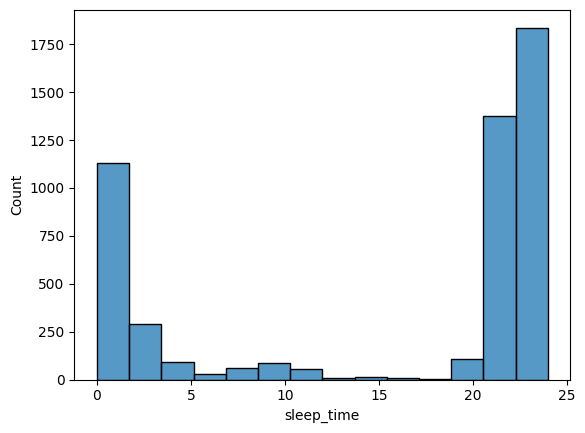

In [28]:
sns.histplot(x = 'sleep_time', data =df)

<Axes: xlabel='sleep_time'>

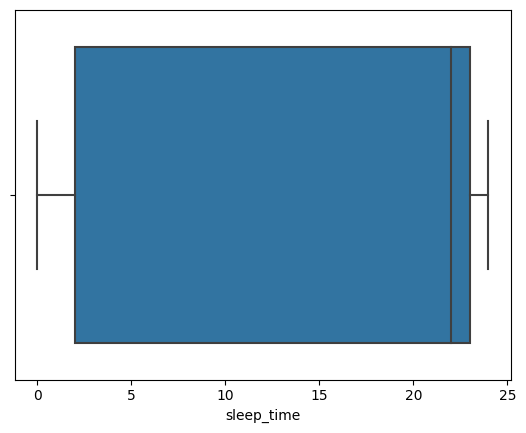

In [29]:
sns.boxplot(x = 'sleep_time', data =df)